![title](amu.png)

# <h1><center>Projet n°3</center></h1>

<h1><center>Etude de la propagation d'opinion sur un réseau social</center></h1>

## 1 Modélisation d'un réseau social

**Question 1 :**

a. Pour passer d'un graphe orienté a un graphe non orienté il faut que pour toute arrête $x \to y$ il existe aussi l'arrête "réciproque" $y \to x$.

b. S'il $\exists x$ tel que $x \to x$ et $\not\exists y \in G$, $ x \to y$ on peut en déduire que x ne suit personne si ce n'est lui même.

c. 

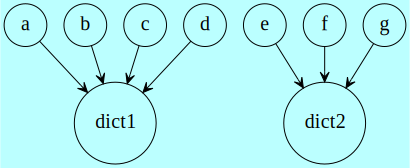

In [1]:
from graphviz import Digraph
from random import randint
import numpy as np

dot = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
dot.attr(bgcolor='paleturquoise1')
dot.edge('a', 'dict1', '')
dot.edge('b', 'dict1', '')
dot.edge('c', 'dict1', '')
dot.edge('d', 'dict1', '')

dot.edge('e', 'dict2')
dot.edge('f', 'dict2')
dot.edge('g', 'dict2')
dot


**Question 2 :**

a.
\begin{align*} u_{x}^{k+1} = \sum_{y \in G, x \to y} K_{xy}u_{y}^{k} = \sum_{y \in G, x \to y} K_{xy}u_{y}^{k} + 0  \end{align*}

Or on a vu que $\sum_{y \in G, x \not \to y} K_{xy}u_{y}^{k} = 0$ on peut donc écrire que :
\begin{align*} u_{x}^{k+1} = \sum_{y \in G, x \to y} K_{xy}u_{y}^{k} + \sum_{y \in G, x \not \to y} K_{xy}u_{y}^{k}  \end{align*}

On a donc les arrêtes pour $y \in G, x \to y$ et $y \in G, x \not \to y$, donc toutes les parties de $y$ :
\begin{align*} u_{x}^{k+1} = \sum_{y \in G} K_{xy}u_{y}^{k}   \end{align*}



b. 
Soit $U^k$ l'opinion "générale" au temps k où $u_{x_n}^{k}$ représente l'opinion de $x_n$ au temps k et soit M la matrice des influences, avec :
\begin{align*} U^{k} = 
\begin{pmatrix}
u_{x_1}^{k} \\
u_{x_2}^{k} \\
\vdots \\
u_{x_{N}}^{k} \\
\end{pmatrix}
\ et \ 
M =
\begin{pmatrix}
K_{x_1 x_1} & K_{x_1 x_2} & \cdots & K_{x_1 x_{N-1}} & K_{x_1 x_N}         \\
\vdots      & \ddots      &        &                 & \vdots              \\
\vdots      &             & \ddots &                 & \vdots              \\
\vdots      &             &        & \ddots          & \vdots              \\
K_{x_N x_1} & K_{x_N x_2} & \cdots & K_{x_N x_{N-1}} & K_{x_N x_N}
\end{pmatrix}
\end{align*}

D'aprés la formule (2) qui nous dit que $u_{x}^{k+1} = \sum_{y \in G, x \to y} K_{xy}u_{y}^{k}$, on peut voir que $u_{x}^{k+1}$ se calcule en multipliant la première ligne de la matrice $M$ par le vecteur colonne $U_k$, donc :
\begin{align*} U^{k+1}=MU^{k}  \end{align*}

$N$ correspond a la taille de la matrice des influences $M$ qui regroupe les influences de tous les sommets présent dans le graphe complet représentant ke réseau social, il correspond donc au nombre de personnes présent dans le réseau.

c.
La définition 2 nous dit qu'une matrice $A \in \cal{M}_{N N}(\mathbb{R})$ est stochastique si tous ses coefficients sont positifs ou nuls et si la somme des coefficients de chaque ligne vaut 1. Or on a vu que $M$ est la matrice construite à partir des influences du réseau, et on a vu que une influence est un réel compris entre $0$ et $1$, donc l'hypothèse des coefficients positifs ou nuls est vérifié. L'autre hypothèse pour que $M$ soit dites stochastique est que la somme des coefficients de chaque ligne vaut 1, ce qui est impliqué par le fait que chaque ligne i de la matrice $M$ correspond à la totalité des opinions de la personne i.

Prenons un exemple, par exemple en prenant un graphe aléatoire à n personnes ( voir graphe suivant ) et en créant la matrice $M$ correspondante.

Nombre de sommets :
4
Précision des labels :
2
[0.32, 0.11, 0.21, 0.37]
[0.31, 0.12, 0.44, 0.12]
[0.25, 0.3, 0.25, 0.2]
[0.32, 0.14, 0.14, 0.41]


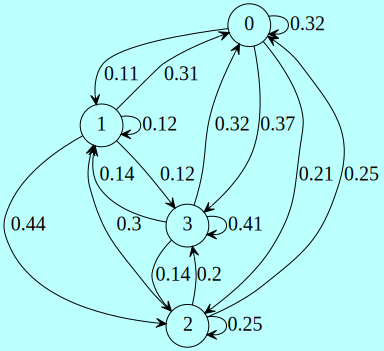

In [2]:
## On crée un 2nd graphe
dot2 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
dot2.attr(bgcolor='paleturquoise1')

print("Nombre de sommets :")
n = int(input()) 
print("Précision des labels :")
p = int(input()) 
#n = int(3) 

# M la matrice des influences
M = []
for lign in range(n):
    row = []
    sum = 0
    for i in range(n):
        randnbr = randint(1, 10)
        row.append(randnbr)
        sum += randnbr
    # On a crée la ligne i sous forme d'un tableau row[] qu'on ajoute a la matrice M grace a .append
    M.append(row)
    # print(sum)
    for i in range(n):
        row[i] = row[i]/sum

        if (row[i] != 0):
            # On prend seulement 2 décimales pour pas avoir de valeur infinie dans le graph ( la somme des influences
            # peut etre différente de 1 a 0.01 prés)
            row[i] = round(row[i],p)
            dot2.edge(str(lign), str(i), str(row[i]))
    print(row)
dot2

d. Au lieu de simplement recopier la matrice M de la FIGURE 1, nous allons 

In [3]:
M1 = np.array([[0.6,0.3,0.1],[0.4,0.1,0.5],[0.2,0.2,0.6]])
M2 = np.array([[1,0,0,0],[0.3,0,0.7,0],[0.1,0.6,0,0.3],[0,1,0,0]])
M3 = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0]])

def matrice_vers_graph (dot,M) :
    for i in range (len(M[0,:])) :
        for j in range (len(M[0,:])) :
            if (M[i,j] !=0):
                dot.edge(str(i), str(j), str(M[i,j]))
    return dot

Cette matrice M correspond au graphe suivant :
[[0.6 0.3 0.1]
 [0.4 0.1 0.5]
 [0.2 0.2 0.6]]


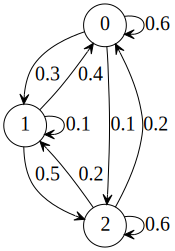

In [4]:
dot8 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
print('Cette matrice M correspond au graphe suivant :', M1, sep='\n')
dot8=matrice_vers_graph(dot8,M1)         
dot8

Cette matrice M correspond au graphe suivant :
[[1.  0.  0.  0. ]
 [0.3 0.  0.7 0. ]
 [0.1 0.6 0.  0.3]
 [0.  1.  0.  0. ]]


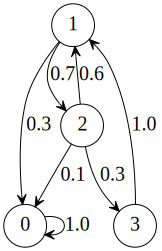

In [5]:
dot9 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
print('Cette matrice M correspond au graphe suivant :', M2, sep='\n')
dot9=matrice_vers_graph(dot9,M2)         
dot9

Cette matrice M correspond au graphe suivant :
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]


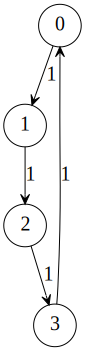

In [6]:
dot10 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
print('Cette matrice M correspond au graphe suivant :', M3, sep='\n')
dot10=matrice_vers_graph(dot10,M3)         
dot10

# Question 3

On pose $\alpha^k=min(U^k)$ et $\beta^k=max(U^k)$

On va montrer que les deux suites $(\alpha^k)_{k\geq0}$ et $(\beta^k)_{k\geq0}$ sont adjacentes

Deux suites réelles $(a_n)$ et $(b_n)$ sont dites adjacentes si l'une des suites est croissante, l'autre suite décroissante et si la différence des deux converge vers 0.

$\textbf{Théorème des suites adjacentes}$ — Soient $(a_n)$ et $(b_n)$ deux suites adjacentes. Alors ces deux suites sont convergentes et ont la même limite $\ell$ $\in$ $\mathbb{R}$




Soit k $\in$ $\mathbb{N}$

\begin{align*} U_x^{k+1} = \alpha^k + \sum_y K_{xy}(U_k^{y} - \alpha^k) \end{align*}

$\geq$ $\alpha^k$ + $K_{xyM}$($U_{yM}^{k}$ - $\alpha^k$) avec $U_{yM}^{k}$ = max($U^k$) et par somme de termes positife car $\forall$ y $\in$ G ($U_{y}^{k}$ - $\alpha^k$) $\geq$ 0 par definition de $\alpha^k$

$\geq$ $\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$) car $K_{xyM}$ $\geq$ $K_{min}$ par definition et $U_{yM}^{k}$ = $\beta^k$

Donc

$U_x^{k+1}$ $\geq$ $\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$)

Or

$\alpha^{k+1}$ = min($U^{k+1}$)=inf($U^{k+1}$)

d'ou

$\alpha^{k+1}$ $\geq$ $\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$) par definition de l'inf

donc

$\alpha^{k+1}$ $\geq$ $\alpha^k$ car  $K_{min}$ $\geq$ 0 et ($\beta^k$ - $\alpha^k$)$\geq$ 0

Conclusion

$(\alpha^k)_{k\in\mathbb{N}}$ est croisant





$U_x^{k+1}$ = $\beta^k$ + $\sum_y K_{xy}$($U_k^{y}$ - $\beta^k$) On a $\forall$ y : 0 $\geq$ ($U_x^{k}$-$\beta^k$)

$\leq$ $\beta^k$ + $K_{xym}$($U_{ym}^{k}$-$\beta^k$) par somme de termes negatife

$\leq$ $\beta^k$ + $K_{xym}$($\alpha^k$-$\beta^k$) par definition $U_{ym}^{k}$ = $\beta^k$

pour x, y $\in$G on a $K_{min}$ $\leq$ $K_{xy}$ pour a $\leq$ 0 on a: a$K_{min}$ $\geq$ a$K_{xy}$

Donc $U_x^{k+1}$ $\leq$ $\beta^k$ + $K_{min}$($\alpha^k$-$\beta^k$)

Or le sup est le plus petit des majorants

Donc $\beta^{k+1}$ $\leq$ $\beta^k$ + $K_{min}$($\alpha^k$-$\beta^k$)

d'ou $\beta^{k+1}$ $\leq$ $\beta^k$  car $K_{min}$($\alpha^k$-$\beta^k$) $\leq$ 0

Conclusion

$(\beta^k)_{k\in\mathbb{N}}$ est decroisant





On s'interesse a la limite

$\alpha^{k+1}$ $\geq$ $\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$)

-$\alpha^{k+1}$ $\leq$-($\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$))   (L1)

$\beta^{k+1}$ $\leq$ $\beta^k$ + $K_{min}$($\alpha^k$-$\beta^k$)      (L2)

(L1)+(L2)

$\beta^{k+1}$ -$\alpha^{k+1}$ $\leq$ $\beta^k$ + $K_{min}$($\alpha^k$-$\beta^k$) -($\alpha^k$ + $K_{min}$ ($\beta^k$ - $\alpha^k$))

$\leq$ $\beta^{k}$ -$\alpha^{k}$ - 2 $K_{min}$ ($\beta^k$ - $\alpha^k$) car -$K_{min}$ ($\beta^k$ - $\alpha^k$) = $K_{min}$ ($\alpha^k$ - $\beta^k$)

$\leq$ (1 - 2 $K_{min}$) ($\beta^k$ - $\alpha^k$) avec ($\beta^{k+1}$ - $\alpha^{k+1}$)$\geq$ 0 par definition de $\alpha^k$ et $\beta^k$





Ainsi on a

0 $\leq$ $\beta^{k+1}$ -$\alpha^{k+1}$ $\leq$ (1 - 2 $K_{min}$) ($\beta^k$ - $\alpha^k$)

or la suite geometrique de raison (1 - 2 $K_{min}$) tend vers 0

Donc d'aprres le theomreme des Gendarme on a que

lim $\beta^{k+1}$ -$\alpha^{k+1}$ = 0

$\lim\limits_{k \rightarrow +\infty} \beta^{k+1}-\alpha^{k+1}$ = 0

On a $\beta^k$ decroissante $\alpha^k$ croissante et le leur difernece tend vers 0  donc  $\beta^k$  et $\alpha^k$ sont adjacentes

Nombre de sommets :
4
Rentrez les valeurs de U0.
10
25
30
40
La matrice U :
[[10.]
 [25.]
 [30.]
 [40.]]


Combien d'influenceur voulez-vous ?
1
[1, 0, 0, 0]
La matrice M est :
[0.67, 0.0, 0.0, 0.33]
[0.0, 0.2, 0.6, 0.2]
[0.18, 0.41, 0.12, 0.29]


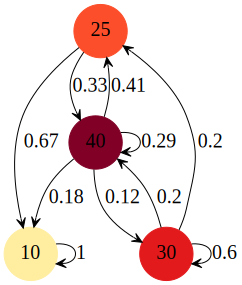

In [7]:
#Q4

# On crée un graphe
dot7 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})
#dot7.attr(bgcolor='paleturquoise1')

print("Nombre de sommets :")
n = int(input()) 
p = 2

# On créer U0 
print("Rentrez les valeurs de U0.")
U = np.zeros([n,1])
for j in range(n):
    temp = int(input())
    U[j, 0] = temp
    dot7.node(str(j), str(temp))
print('La matrice U :', U,'\n',sep='\n')
# M la matrice des influences
M = []
#On demande le nombre d'influenceur
print("Combien d'influenceur voulez-vous ?")
nbr_inf = int(input()) 
for k in range (nbr_inf):
    ligne = []
    for l in range (n):
        if (l==k) :
            ligne.append(1)
        else :
            ligne.append(0)
    dot7.edge(str(k), str(k), str(1))
    print(ligne)
    M.append(ligne)
print("La matrice M est :")
for lign in range(n):
    if (lign>=nbr_inf):
        row = []
        sum = 0
        for i in range(n):
            randnbr = randint(0, 10)
            row.append(randnbr)
            sum += randnbr
        # On a crée la ligne i sous forme d'un tableau row[] qu'on ajoute a la matrice M grace a .append
        M.append(row)
        ## print(sum)
        # On normalise la ligne
        for i in range(n):
            if (sum != 0):
                row[i] = row[i]/sum

                if (row[i] != 0):
                    # On prend seulement 2 décimales pour pas avoir de valeur infinie dans le graph ( la somme des influences
                    # peut etre différente de 1 a 0.01 prés)
                    row[i] = round(row[i],p)
                    dot7.edge(str(lign), str(i), str(row[i]))

            elif (sum == 0):
                printf("Vous n'avez pas eu de chance, vous êtes tombés sur une ligne de 0.")
        print(row)


def color (n) :
    if(n<2): return 1
    elif(n<3): return 2
    elif(n<4): return 3
    elif(n<5): return 4
    elif(n<6): return 5
    elif(n<7): return 6
    elif(n<8): return 7
    elif(n<9): return 8
    else: return 9

#On cherche le maximum des valeurs de U pour pouvoir colorer les noeuds du graphe en fonction de lui
maxi = max(U[:,0])
for j in range(n):
    dot7.node(str(j),style='filled',colorscheme='ylorrd9',color=str(color(U[j,0]/maxi*10)))
dot7

Sur combien d'intervalles de temps souhaitez vous voir la propagation d'opinion ?
3
Intervalle de temps 1 appliqué
U0  vaut : 
 [[10.  ]
 [19.9 ]
 [31.  ]
 [27.25]]

Intervalle de temps 2 appliqué
U1  vaut : 
 [[10.    ]
 [15.6925]
 [28.03  ]
 [21.5815]]

Intervalle de temps 3 appliqué
U2  vaut : 
 [[10.      ]
 [13.821895]
 [24.2728  ]
 [17.85616 ]]

U3  vaut : 
 [[10.      ]
 [13.821895]
 [24.2728  ]
 [17.85616 ]]


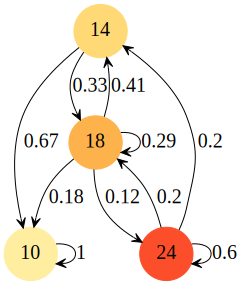

In [8]:
def mise_a_jour (U, i, dot):
    for j in range (n) :
        dot7.node(str(j), str(int(round(U[j,0],0))),style='filled',colorscheme='ylorrd9',color=str(color(U[j,0]/maxi*10)))
    print("U"+str(i) , ' vaut : \n' , U)
    dot.view()
    input()

# On a créer M et U, on s'occupe maintenant de modéliser la propagation d'opinion
print("Sur combien d'intervalles de temps souhaitez vous voir la propagation d'opinion ?")
k = int(input())
U0 = np.copy(U)
for i in range(k):
    print('Intervalle de temps', i+1, 'appliqué')
    U = np.dot(M,U)
    if ((i<=3) or ((i%5==0)and (i!=0))) :
        mise_a_jour(U,i,dot7)
print("U"+str(k) , ' vaut : \n' , U)
dot7

Combien de sommets dans votre graphe ?
4
Nombre de sommets : 4
La matrice U, générée aléatoirement :
[[7.]
 [9.]
 [2.]
 [7.]]


Voici la matrice stochastique à 0,01 prés à cause des arrondis  des influences M générée aléatoirement :
[0.28, 0.0, 0.33, 0.39]
[0.56, 0.11, 0.11, 0.22]
[0.12, 0.35, 0.35, 0.19]
[0.17, 0.33, 0.42, 0.08]

 On applique un algorithme pour trouver a partir du nombre op généré aléatoirement, quelle opinion lagent x va suivre : 

ligne 0 , rand = 0.0
c= 0.28
L'agent 0 suivra l'opinion de la personne 0 

ligne 1 , rand = 0.7
c= 0.56
c= 0.67
c= 0.78
L'agent 1 suivra l'opinion de la personne 2 

ligne 2 , rand = 0.1
c= 0.12
L'agent 2 suivra l'opinion de la personne 0 

ligne 3 , rand = 0.5
c= 0.17
c= 0.5
L'agent 3 suivra l'opinion de la personne 1 

 
On obient la matrice S suivante nous indiquant quelle opinion lagent x suit
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


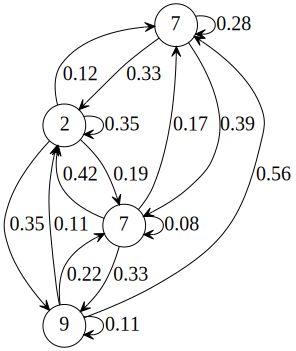

In [9]:
#Q5

# On crée un graphe
dot5 = Digraph(node_attr={'shape': 'circle', 'fontsize': '20'}, edge_attr={'arrowhead': 'open', 'fontsize': '20'})

print('Combien de sommets dans votre graphe ?')
n = int(input()) 
#n = 5
p = 2
print('Nombre de sommets :', n)
# On créer U = S{0,x} l'opinion de départ choisie aléatoirement
U = np.zeros([n,1])
for j in range(n):
    temp = randint(0, 10)
    U[j, 0] = temp
    dot5.node(str(j), str(temp))
print('La matrice U, générée aléatoirement :', U,'\n',sep='\n')

print('Voici la matrice stochastique à 0,01 prés à cause des arrondis  des influences M générée aléatoirement :')
# M la matrice des influences
M = []
for lign in range(n):
    row = []
    sum = 0
    for i in range(n):
        randnbr = randint(0, 10)
        row.append(randnbr)
        sum += randnbr
    # On a crée la ligne i sous forme d'un tableau row[] qu'on ajoute a la matrice M grace a .append
    M.append(row)
    ## print(sum)
    # On normalise la ligne
    for i in range(n):
        if (sum != 0):
            row[i] = row[i]/sum
            if (row[i] != 0):
                # On prend seulement 2 décimales pour pas avoir de valeur infinie dans le graph ( la somme des influences
                # peut etre différente de 1 a 0.01 prés)
                row[i] = round(row[i],p)
                dot5.edge(str(lign), str(i), str(row[i]))
        elif (sum == 0):
            printf("Vous n'avez pas eu de chance, vous êtes tombés sur une ligne de 0, cas non accepté.")
    print(row)

    
# S sera la matrice avec chaque ligne remplie de 0 sauf pour la colonne de l'opinion a suivre qui elle sera un 1, elle reste stochastique
S = np.zeros([n,n])
print('\n','On applique un algorithme pour trouver a partir du nombre op généré aléatoirement, quelle opinion lagent x va suivre :', '\n')
for lign in range(n):
    # c sera le compteur pour savoir quelle opinion l'agent x va suivre
    c = 0
    op = (randint(0,10))/10
    print('ligne', str(lign), ', rand =', op)
    for i in range(n):
        c = round(M[lign][i],p) + c
        print('c=',c)
        if(op <= c):
            S[lign, i] = 1
            print('L\'agent', lign,  'suivra l\'opinion de la personne', i, '\n')
            break
        elif(i==n):
            S[lign, i] = 1
            print('L\'agent', lign,  'suivra l\'opinion de la personne', i, '\n')
        #else:
            #print("cas 3:rand>c")
print(' ','On obient la matrice S suivante nous indiquant quelle opinion lagent x suit', S, sep="\n")
dot5